In [ ]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from pre_processing import normalize
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [4]:
y = housing.target

In [5]:
features  = len(df.columns)
features

8

In [6]:
X = df.copy()

In [7]:
df_final = pd.concat([df, pd.DataFrame(y.reshape(-1, 1), columns=['target'])], axis=1)

In [8]:
df_final.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [9]:
 import tensorflow as tf

In [10]:
mnist = tf.keras.datasets.california_housing
(X_train, y_train),(X_test, y_test) = mnist.load_data()

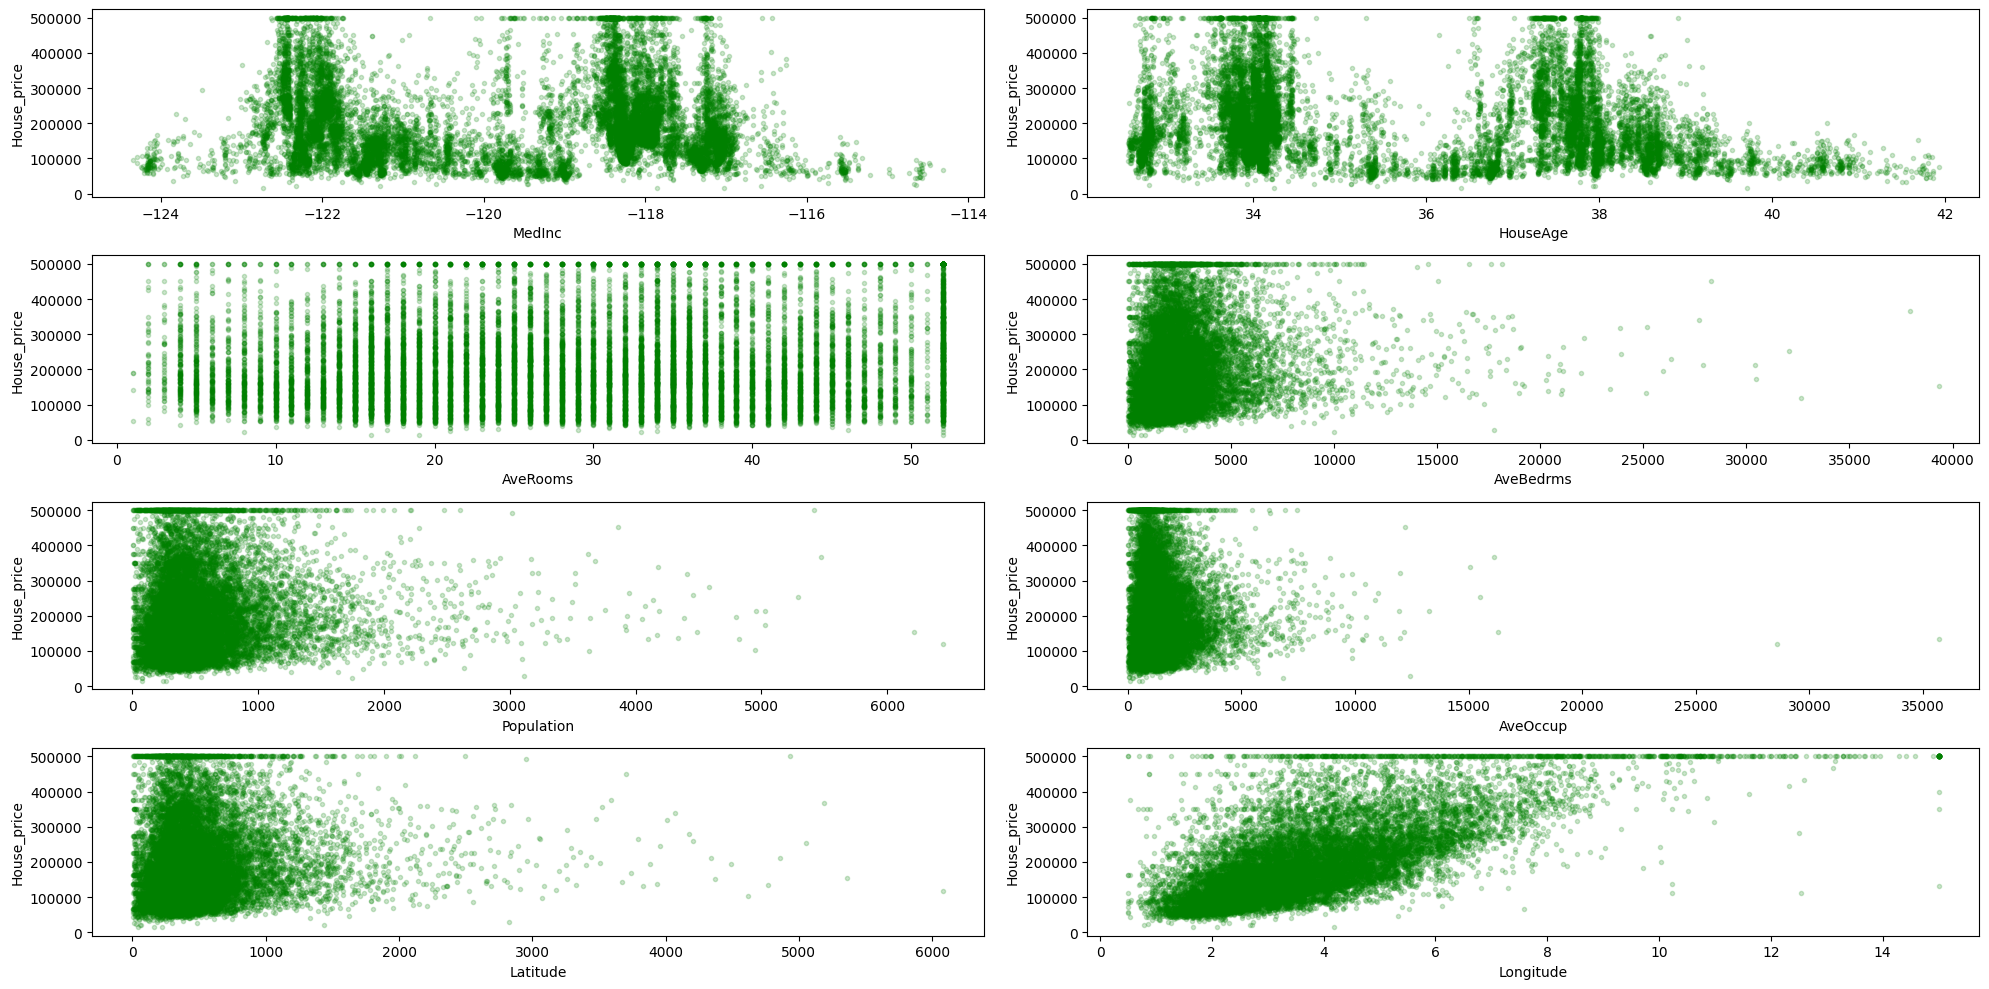

In [11]:
cols = 2 
rows = features // cols 
fig , axes = plt.subplots(rows , cols , figsize = (20,10))
for y in range(rows):
    for x in range(cols):
        axe = axes[y , x]
        X_train_draw = X_train[: , y * cols + x ]
        axe.scatter(X_train_draw , y_train , marker = "." , color = 'green' , alpha = 0.2)
        axe.set_xlabel(f"{df.columns[y*cols + x]}")
        axe.set_ylabel(f"House_price")
plt.tight_layout()
plt.show()

In [12]:
normalized_X_train, x_scaler = normalize.normalize(X_train)
normalized_X_test = normalize.normalize(X_test, x_scaler)

normalized_y_train, y_scaler = normalize.normalize(y_train.reshape(-1, 1))
normalized_y_test = normalize.normalize(y_test.reshape(-1, 1), y_scaler)

In [13]:
 import tensorflow as tf

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0709 - root_mean_squared_error: 0.2640 - val_loss: 0.0544 - val_root_mean_squared_error: 0.2332
Epoch 2/500
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0524 - root_mean_squared_error: 0.2288 - val_loss: 0.0492 - val_root_mean_squared_error: 0.2218
Epoch 3/500
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0464 - root_mean_squared_error: 0.2155 - val_loss: 0.0422 - val_root_mean_squared_error: 0.2055
Epoch 4/500
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0383 - root_mean_squared_error: 0.1957 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1840
Epoch 5/500
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0313 - root_mean_squared_error: 0.1769 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1626
Epoch 6/500
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0250 - root_mean_squared_error: 0.1581 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1522
Epoch 7/500
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

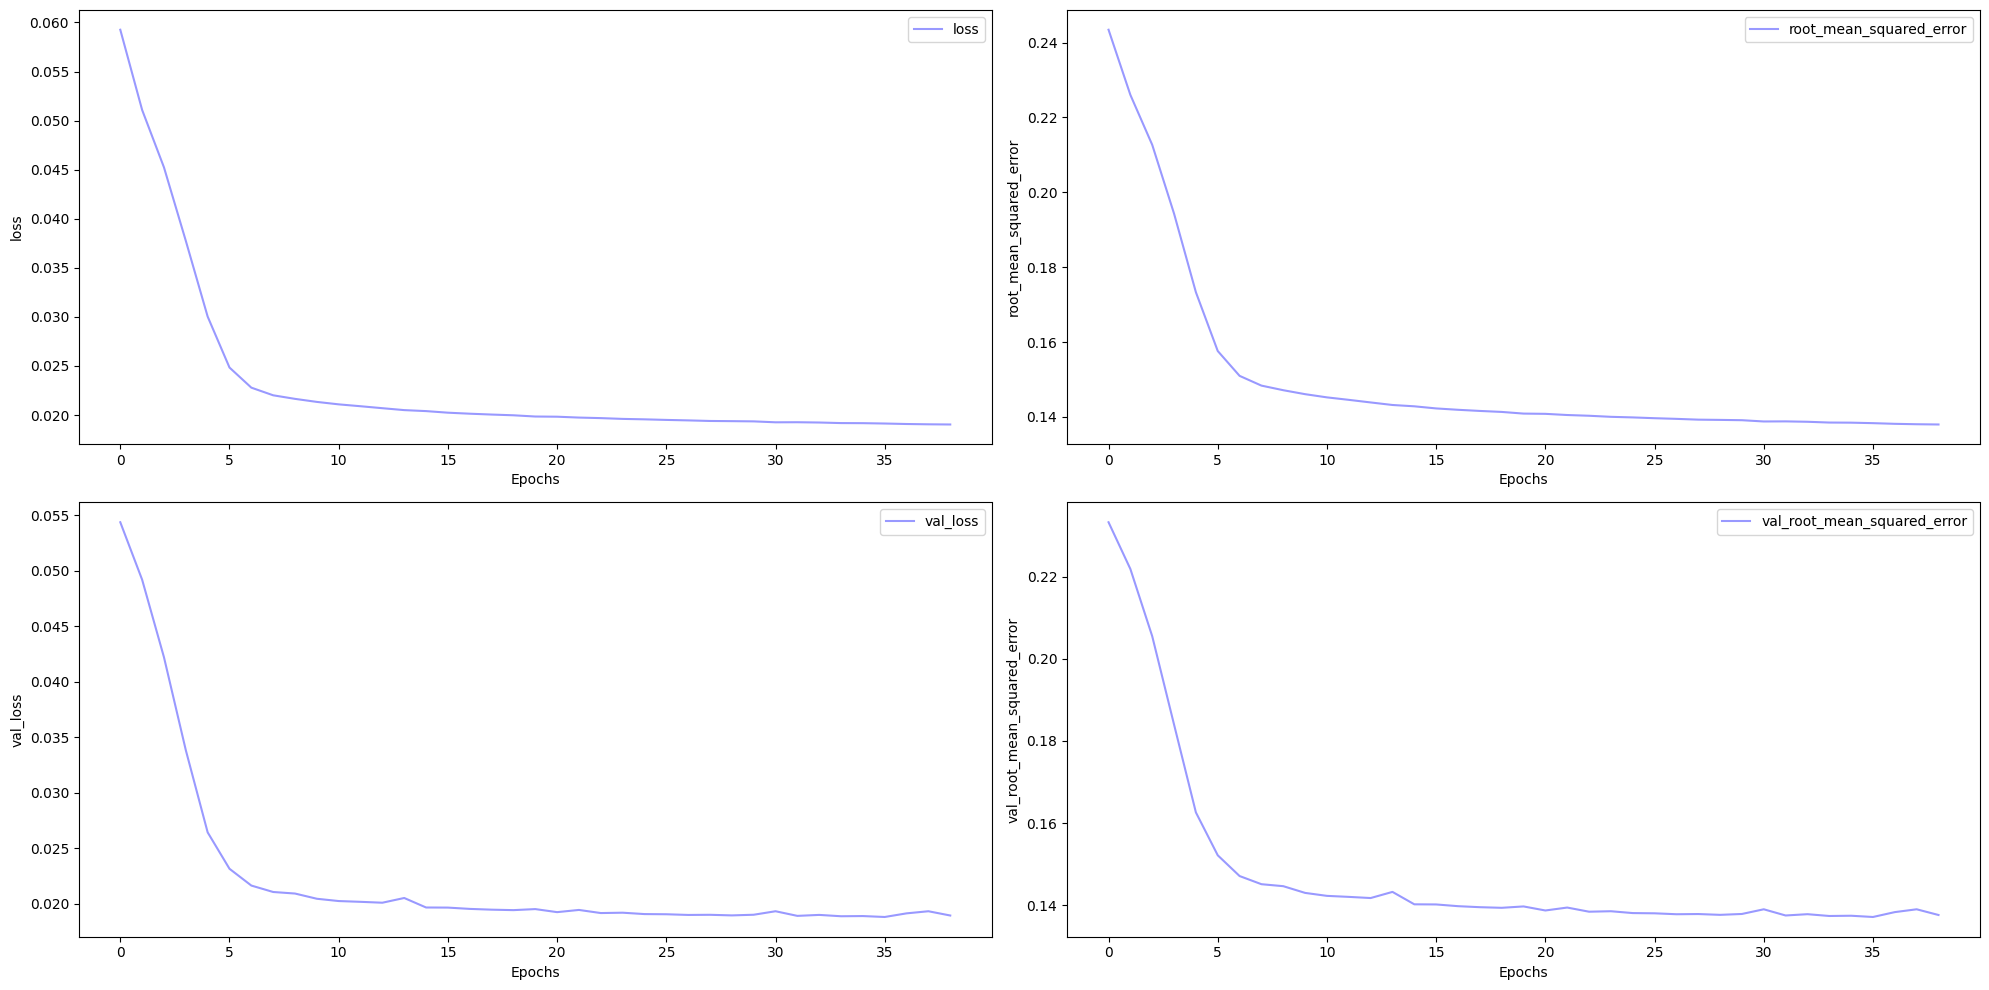

In [14]:
from Models.ANN import ANN
ann_model = ANN(input_shape = normalized_X_train[0].shape, output_shape = 1, learning_rate = 0.01, epochs = 500 , batch_size=16)
ann_model.y_scaler = y_scaler 
ann_model.x_scaler = x_scaler 
ann_model.fit(X = normalized_X_train, y = normalized_y_train)

In [15]:
# y_pred_normalized = ann_model.predict(normalized_X_test[0])  # ✅ chỉ lấy mảng
# y_pred = y_scaler.inverse_transform(y_pred_normalized)

In [16]:
# from sklearn.metrics import r2_score
# r2 = r2_score(y_test.flatten(), y_pred.flatten())
# print("R2 Score:", r2)

In [18]:
ann_model.evaluate_custom_metrics(
    X_test=normalized_X_test[0],
    y_test=y_test,  # chú ý: dùng y_test gốc
    inverse_transform=True
)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step
== Custom Regression Metrics ==
MSE: 4891982848.0000
MAE: 49988.9570
RMSE: 69942.7112
R2_SCORE: 0.6320


{'mse': 4891983000.0,
 'mae': 49988.957,
 'rmse': 69942.71118565537,
 'r2_score': 0.6320253014564514}

In [20]:
ann_model.model.save('ann_housing_model.h5')

In [22]:
import joblib
joblib.dump(x_scaler, 'scaler_X.pkl')

['scaler_X.pkl']

In [23]:
if hasattr(ann_model, 'y_scaler'):
    joblib.dump(ann_model.y_scaler, 'scaler_y.pkl')